In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import TimestreamHelperFunctions as Thf
import PulseTriggeringTools as Ptt

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf

%matplotlib notebook

In [2]:
## Define the runs of interest
run_dict_50 = {"series": [
    "20220715_145805",
    "20220715_145637",
    "20220715_145510",
    "20220715_145339"] , 
            "Vled"  : [
    6.000,
    5.000,
    4.000,
    3.000] }
n_runs_50 = len(run_dict_50["series"])
run_df_50 = pd.DataFrame(run_dict_50)
print("Total runs (@ -50 dBm):",n_runs_50)

run_dict = {"series": [
    "20220715_143419",
    "20220715_143109",
    "20220715_142937",
    "20220715_142749",
    "20220715_142607",
    "20220715_144926",
    "20220715_143744",
    "20220715_143614"
            ] , 
            "Vled"  : [
    6.500,
    5.500,
    5.000,
    4.500,
    4.000,
    3.500,
    3.000,
    2.500
            ] }
n_runs = len(run_dict["series"])
run_df = pd.DataFrame(run_dict)
print("Total runs (@ -40 dBm):",n_runs)

Total runs (@ -50 dBm): 4
Total runs (@ -40 dBm): 8


In [3]:
noise_files = np.zeros(n_runs, dtype='object')
vna_files   = np.zeros(n_runs, dtype='object')
powers      = np.zeros(n_runs)
i = 0

for series in run_df['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df["noise path"] = noise_files
run_df["vna path"]   = vna_files
run_df["power"]      = powers

## Fill these columns in later
run_df["pls_sec_s"] = [None]*n_runs
run_df["N_pls_fnd"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["p_rate_Hz"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df["pls_sec_f"] = [None]*n_runs # np.zeros(n_runs, dtype=type(None))
run_df

series  Vled                                         noise path  \
0  20220715_143419   6.5  /data/USRP_Noise_Scans/20220715/20220715_14341...   
1  20220715_143109   5.5  /data/USRP_Noise_Scans/20220715/20220715_14310...   
2  20220715_142937   5.0  /data/USRP_Noise_Scans/20220715/20220715_14293...   
3  20220715_142749   4.5  /data/USRP_Noise_Scans/20220715/20220715_14274...   
4  20220715_142607   4.0  /data/USRP_Noise_Scans/20220715/20220715_14260...   
5  20220715_144926   3.5  /data/USRP_Noise_Scans/20220715/20220715_14492...   
6  20220715_143744   3.0  /data/USRP_Noise_Scans/20220715/20220715_14374...   
7  20220715_143614   2.5  /data/USRP_Noise_Scans/20220715/20220715_14361...   

                                            vna path  power pls_sec_s  \
0  /data/USRP_Noise_Scans/20220715/20220715_14341...  -40.0      None   
1  /data/USRP_Noise_Scans/20220715/20220715_14310...  -40.0      None   
2  /data/USRP_Noise_Scans/20220715/20220715_14293...  -40.0      None   
3  /data/USRP_Noise_Scans/20220715/20220715_14274...  -40.0      None   
4  /data/USRP_Noise_Scans/20220715/20220715_14260...  -40.0      None   
5  /data/USRP_Noise_Scans/20220715/20220715_14492...  -40.0      None   
6  /data/USRP_Noise_Scans/20220715/20220715_14374...  -40.0      None   
7  /data/USRP_Noise_Scans/20220715/20220715_14361...  -40.0      None   

  N_pls_fnd p_rate_Hz pls_sec_f  
0      None      None      None  
1      None      None      None  
2      None      None      None  
3      None      None      None  
4      None      None      None  
5      None      None      None  
6      None      None      None  
7      None      None      None

In [4]:
noise_files = np.zeros(n_runs_50, dtype='object')
vna_files   = np.zeros(n_runs_50, dtype='object')
powers      = np.zeros(n_runs_50)
i = 0

for series in run_df_50['series'].to_numpy():
    data_path = os.path.join('/data/USRP_Noise_Scans',series.split('_')[0],series)
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series, verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    powers[i]      = metadata['power']
    noise_files[i] = tone_files[0]
    vna_files[i]   = vna_file
    i += 1
    
run_df_50["noise path"] = noise_files
run_df_50["vna path"]   = vna_files
run_df_50["power"]      = powers

## Fill these columns in later
run_df_50["pls_sec_s"] = [None]*n_runs_50
run_df_50["N_pls_fnd"] = [None]*n_runs_50 # np.zeros(n_runs, dtype=type(None))
run_df_50["p_rate_Hz"] = [None]*n_runs_50 # np.zeros(n_runs, dtype=type(None))
run_df_50["pls_sec_f"] = [None]*n_runs_50 # np.zeros(n_runs, dtype=type(None))
run_df_50

series  Vled                                         noise path  \
0  20220715_145805   6.0  /data/USRP_Noise_Scans/20220715/20220715_14580...   
1  20220715_145637   5.0  /data/USRP_Noise_Scans/20220715/20220715_14563...   
2  20220715_145510   4.0  /data/USRP_Noise_Scans/20220715/20220715_14551...   
3  20220715_145339   3.0  /data/USRP_Noise_Scans/20220715/20220715_14533...   

                                            vna path  power pls_sec_s  \
0  /data/USRP_Noise_Scans/20220715/20220715_14580...  -50.0      None   
1  /data/USRP_Noise_Scans/20220715/20220715_14563...  -50.0      None   
2  /data/USRP_Noise_Scans/20220715/20220715_14551...  -50.0      None   
3  /data/USRP_Noise_Scans/20220715/20220715_14533...  -50.0      None   

  N_pls_fnd p_rate_Hz pls_sec_f  
0      None      None      None  
1      None      None      None  
2      None      None      None  
3      None      None      None

In [5]:
dec_fac = 50

## Store some known values for -50 dBm
_ = 0
run_df_50["pls_sec_s"].iloc[_] = 4.585
run_df_50["N_pls_fnd"].iloc[_] = None
run_df_50["p_rate_Hz"].iloc[_] = 100
run_df_50["pls_sec_f"].iloc[_] = 10.0

_ = 1
run_df_50["pls_sec_s"].iloc[_] = 4.7745
run_df_50["N_pls_fnd"].iloc[_] = None
run_df_50["p_rate_Hz"].iloc[_] = 100
run_df_50["pls_sec_f"].iloc[_] = 10.0

_ = 2
run_df_50["pls_sec_s"].iloc[_] = 4.4125
run_df_50["N_pls_fnd"].iloc[_] = None
run_df_50["p_rate_Hz"].iloc[_] = 100
run_df_50["pls_sec_f"].iloc[_] = 10.0

_ = 3
run_df_50["pls_sec_s"].iloc[_] = 4.7595
run_df_50["N_pls_fnd"].iloc[_] = None
run_df_50["p_rate_Hz"].iloc[_] = 100
run_df_50["pls_sec_f"].iloc[_] = 10.0

## Store some known values for -40 dBm
_ = 0
run_df["pls_sec_s"].iloc[_] = 4.038
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 1
run_df["pls_sec_s"].iloc[_] = 4.8735
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 2
run_df["pls_sec_s"].iloc[_] = 4.2915
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 3
run_df["pls_sec_s"].iloc[_] = 4.2935
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 4
run_df["pls_sec_s"].iloc[_] = 4.0225
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 5
run_df["pls_sec_s"].iloc[_] = 3.6475
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 6
run_df["pls_sec_s"].iloc[_] = 4.8555
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

_ = 7
run_df["pls_sec_s"].iloc[_] = 4.830
run_df["N_pls_fnd"].iloc[_] = None
run_df["p_rate_Hz"].iloc[_] = 100
run_df["pls_sec_f"].iloc[_] = 10.0

run_df

/usr/local/share/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


series  Vled                                         noise path  \
0  20220715_143419   6.5  /data/USRP_Noise_Scans/20220715/20220715_14341...   
1  20220715_143109   5.5  /data/USRP_Noise_Scans/20220715/20220715_14310...   
2  20220715_142937   5.0  /data/USRP_Noise_Scans/20220715/20220715_14293...   
3  20220715_142749   4.5  /data/USRP_Noise_Scans/20220715/20220715_14274...   
4  20220715_142607   4.0  /data/USRP_Noise_Scans/20220715/20220715_14260...   
5  20220715_144926   3.5  /data/USRP_Noise_Scans/20220715/20220715_14492...   
6  20220715_143744   3.0  /data/USRP_Noise_Scans/20220715/20220715_14374...   
7  20220715_143614   2.5  /data/USRP_Noise_Scans/20220715/20220715_14361...   

                                            vna path  power pls_sec_s  \
0  /data/USRP_Noise_Scans/20220715/20220715_14341...  -40.0     4.038   
1  /data/USRP_Noise_Scans/20220715/20220715_14310...  -40.0    4.8735   
2  /data/USRP_Noise_Scans/20220715/20220715_14293...  -40.0    4.2915   
3  /data/USRP_Noise_Scans/20220715/20220715_14274...  -40.0    4.2935   
4  /data/USRP_Noise_Scans/20220715/20220715_14260...  -40.0    4.0225   
5  /data/USRP_Noise_Scans/20220715/20220715_14492...  -40.0    3.6475   
6  /data/USRP_Noise_Scans/20220715/20220715_14374...  -40.0    4.8555   
7  /data/USRP_Noise_Scans/20220715/20220715_14361...  -40.0      4.83   

  N_pls_fnd p_rate_Hz pls_sec_f  
0      None       100        10  
1      None       100        10  
2      None       100        10  
3      None       100        10  
4      None       100        10  
5      None       100        10  
6      None       100        10  
7      None       100        10

In [6]:
idx = 7
series = run_df["series"].iloc[idx]
Vled   = run_df["Vled"].iloc[idx]
print(series, ":", Vled, "V")

20220715_143614 : 2.5 V


Line Delay file:  /data/USRP_Noise_Scans/20220715/20220715_143614/USRP_Delay_20220715_143614.h5
VNA scan file:    /data/USRP_Noise_Scans/20220715/20220715_143614/USRP_VNA_20220715_143614.h5
Timestream files: ['/data/USRP_Noise_Scans/20220715/20220715_143614/USRP_Noise_20220715_143614_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220715/20220715_143614/noise_averages_20220715_143614.h5
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220715/20220715_143614/USRP_Noise_20220715_143614_delta0.h5 because override=True!
found 11 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
comput

<IPython.core.display.Javascript object>


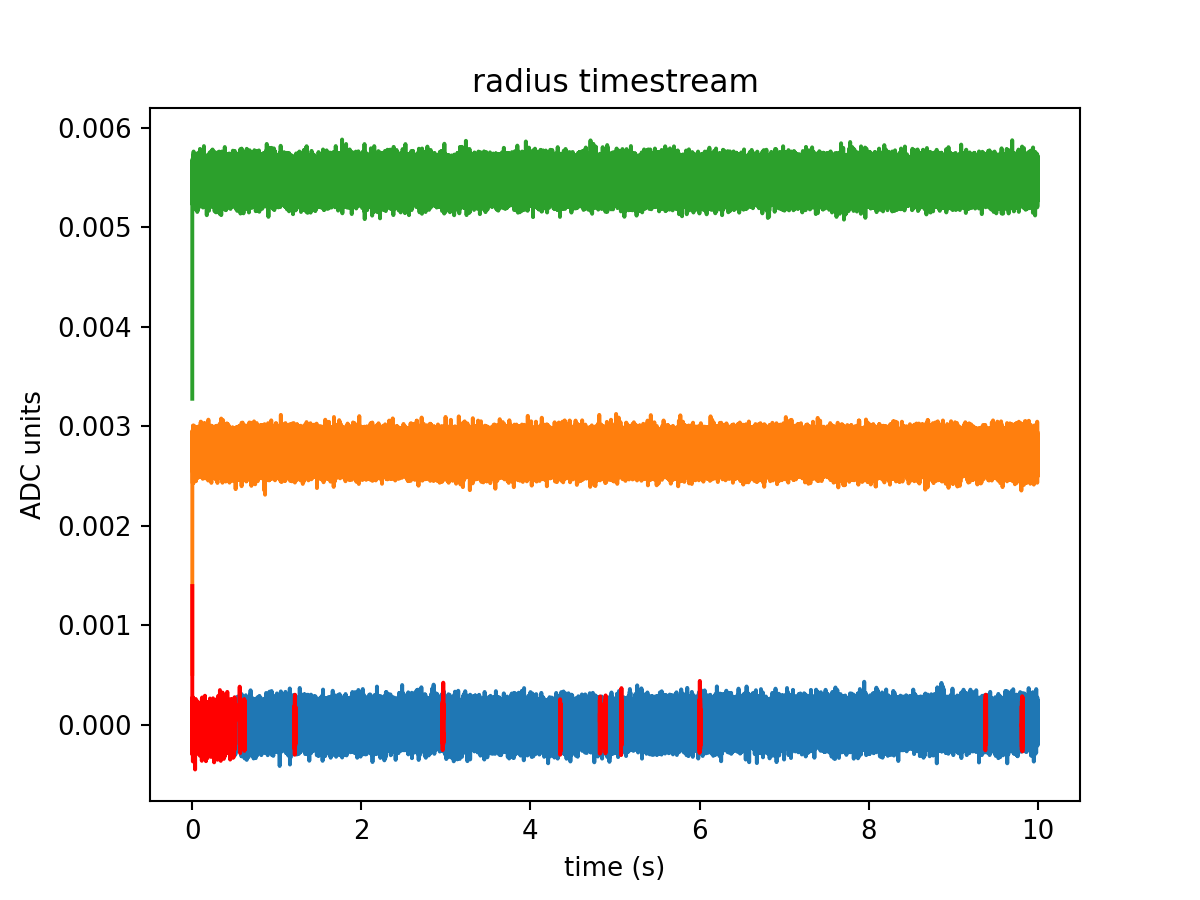

<IPython.core.display.Javascript object>


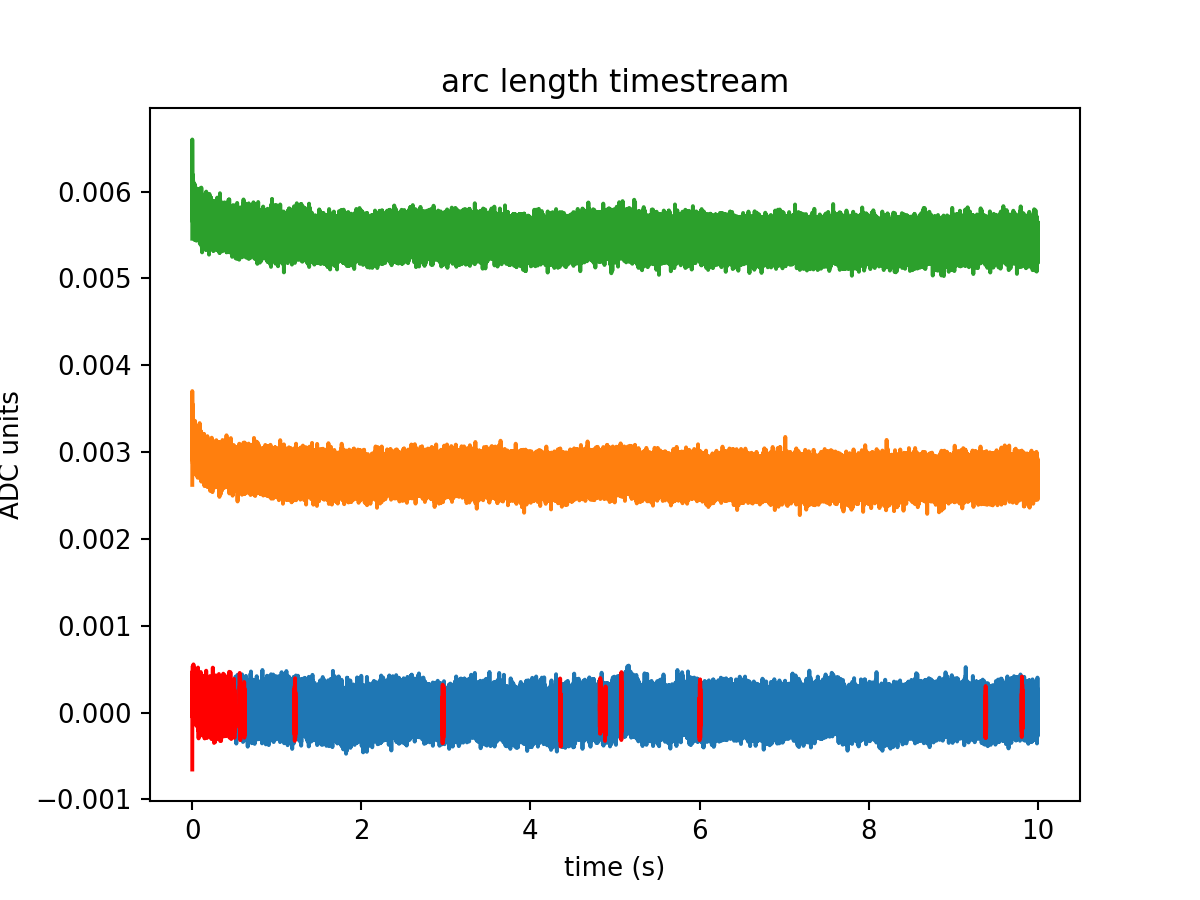

<IPython.core.display.Javascript object>


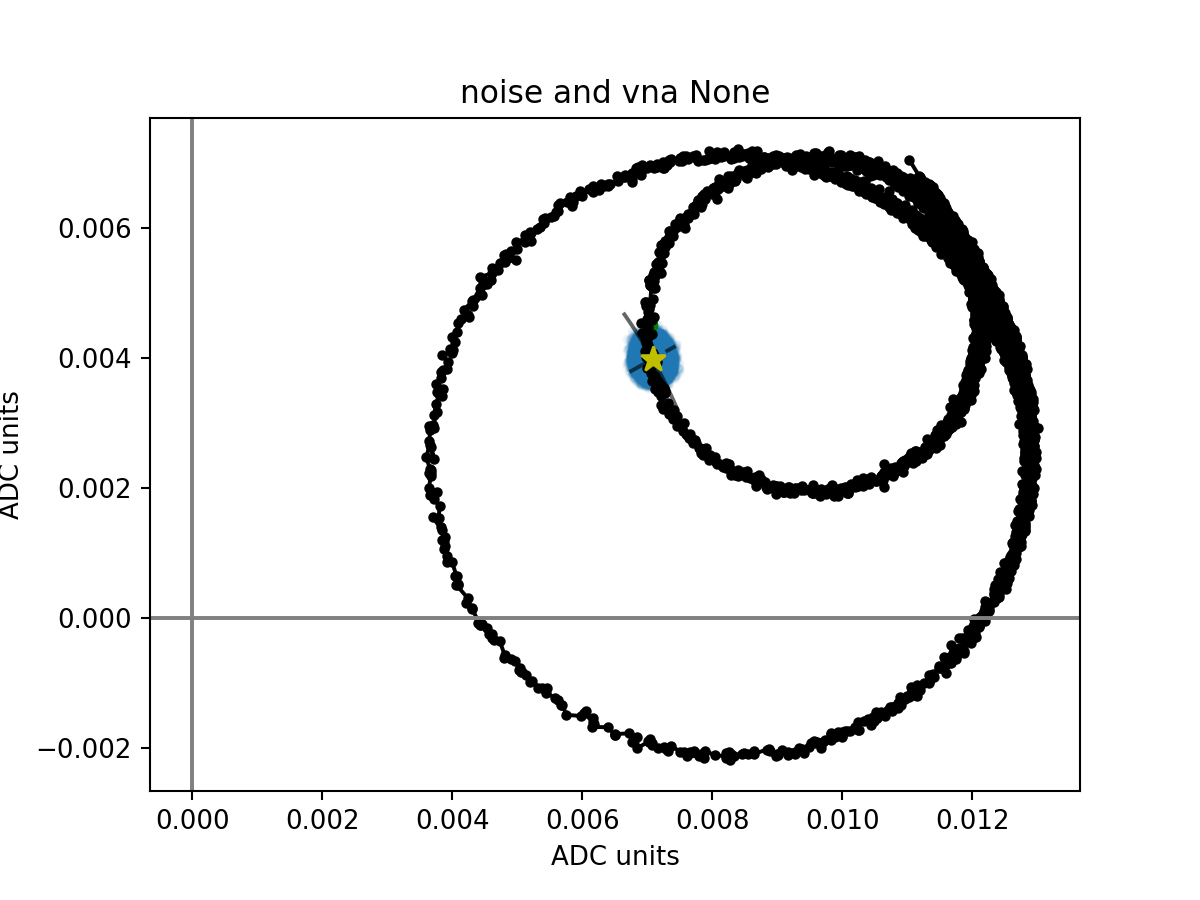

<IPython.core.display.Javascript object>


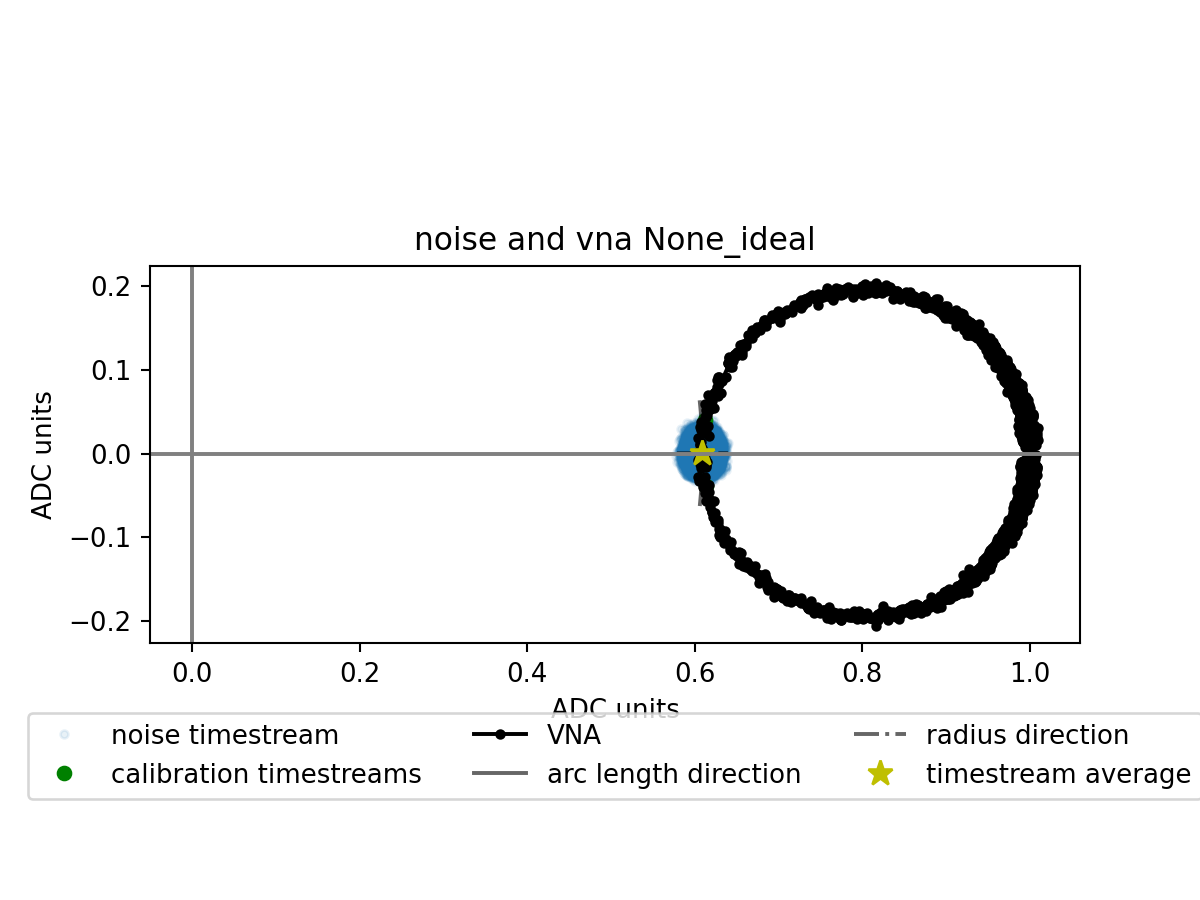

<IPython.core.display.Javascript object>


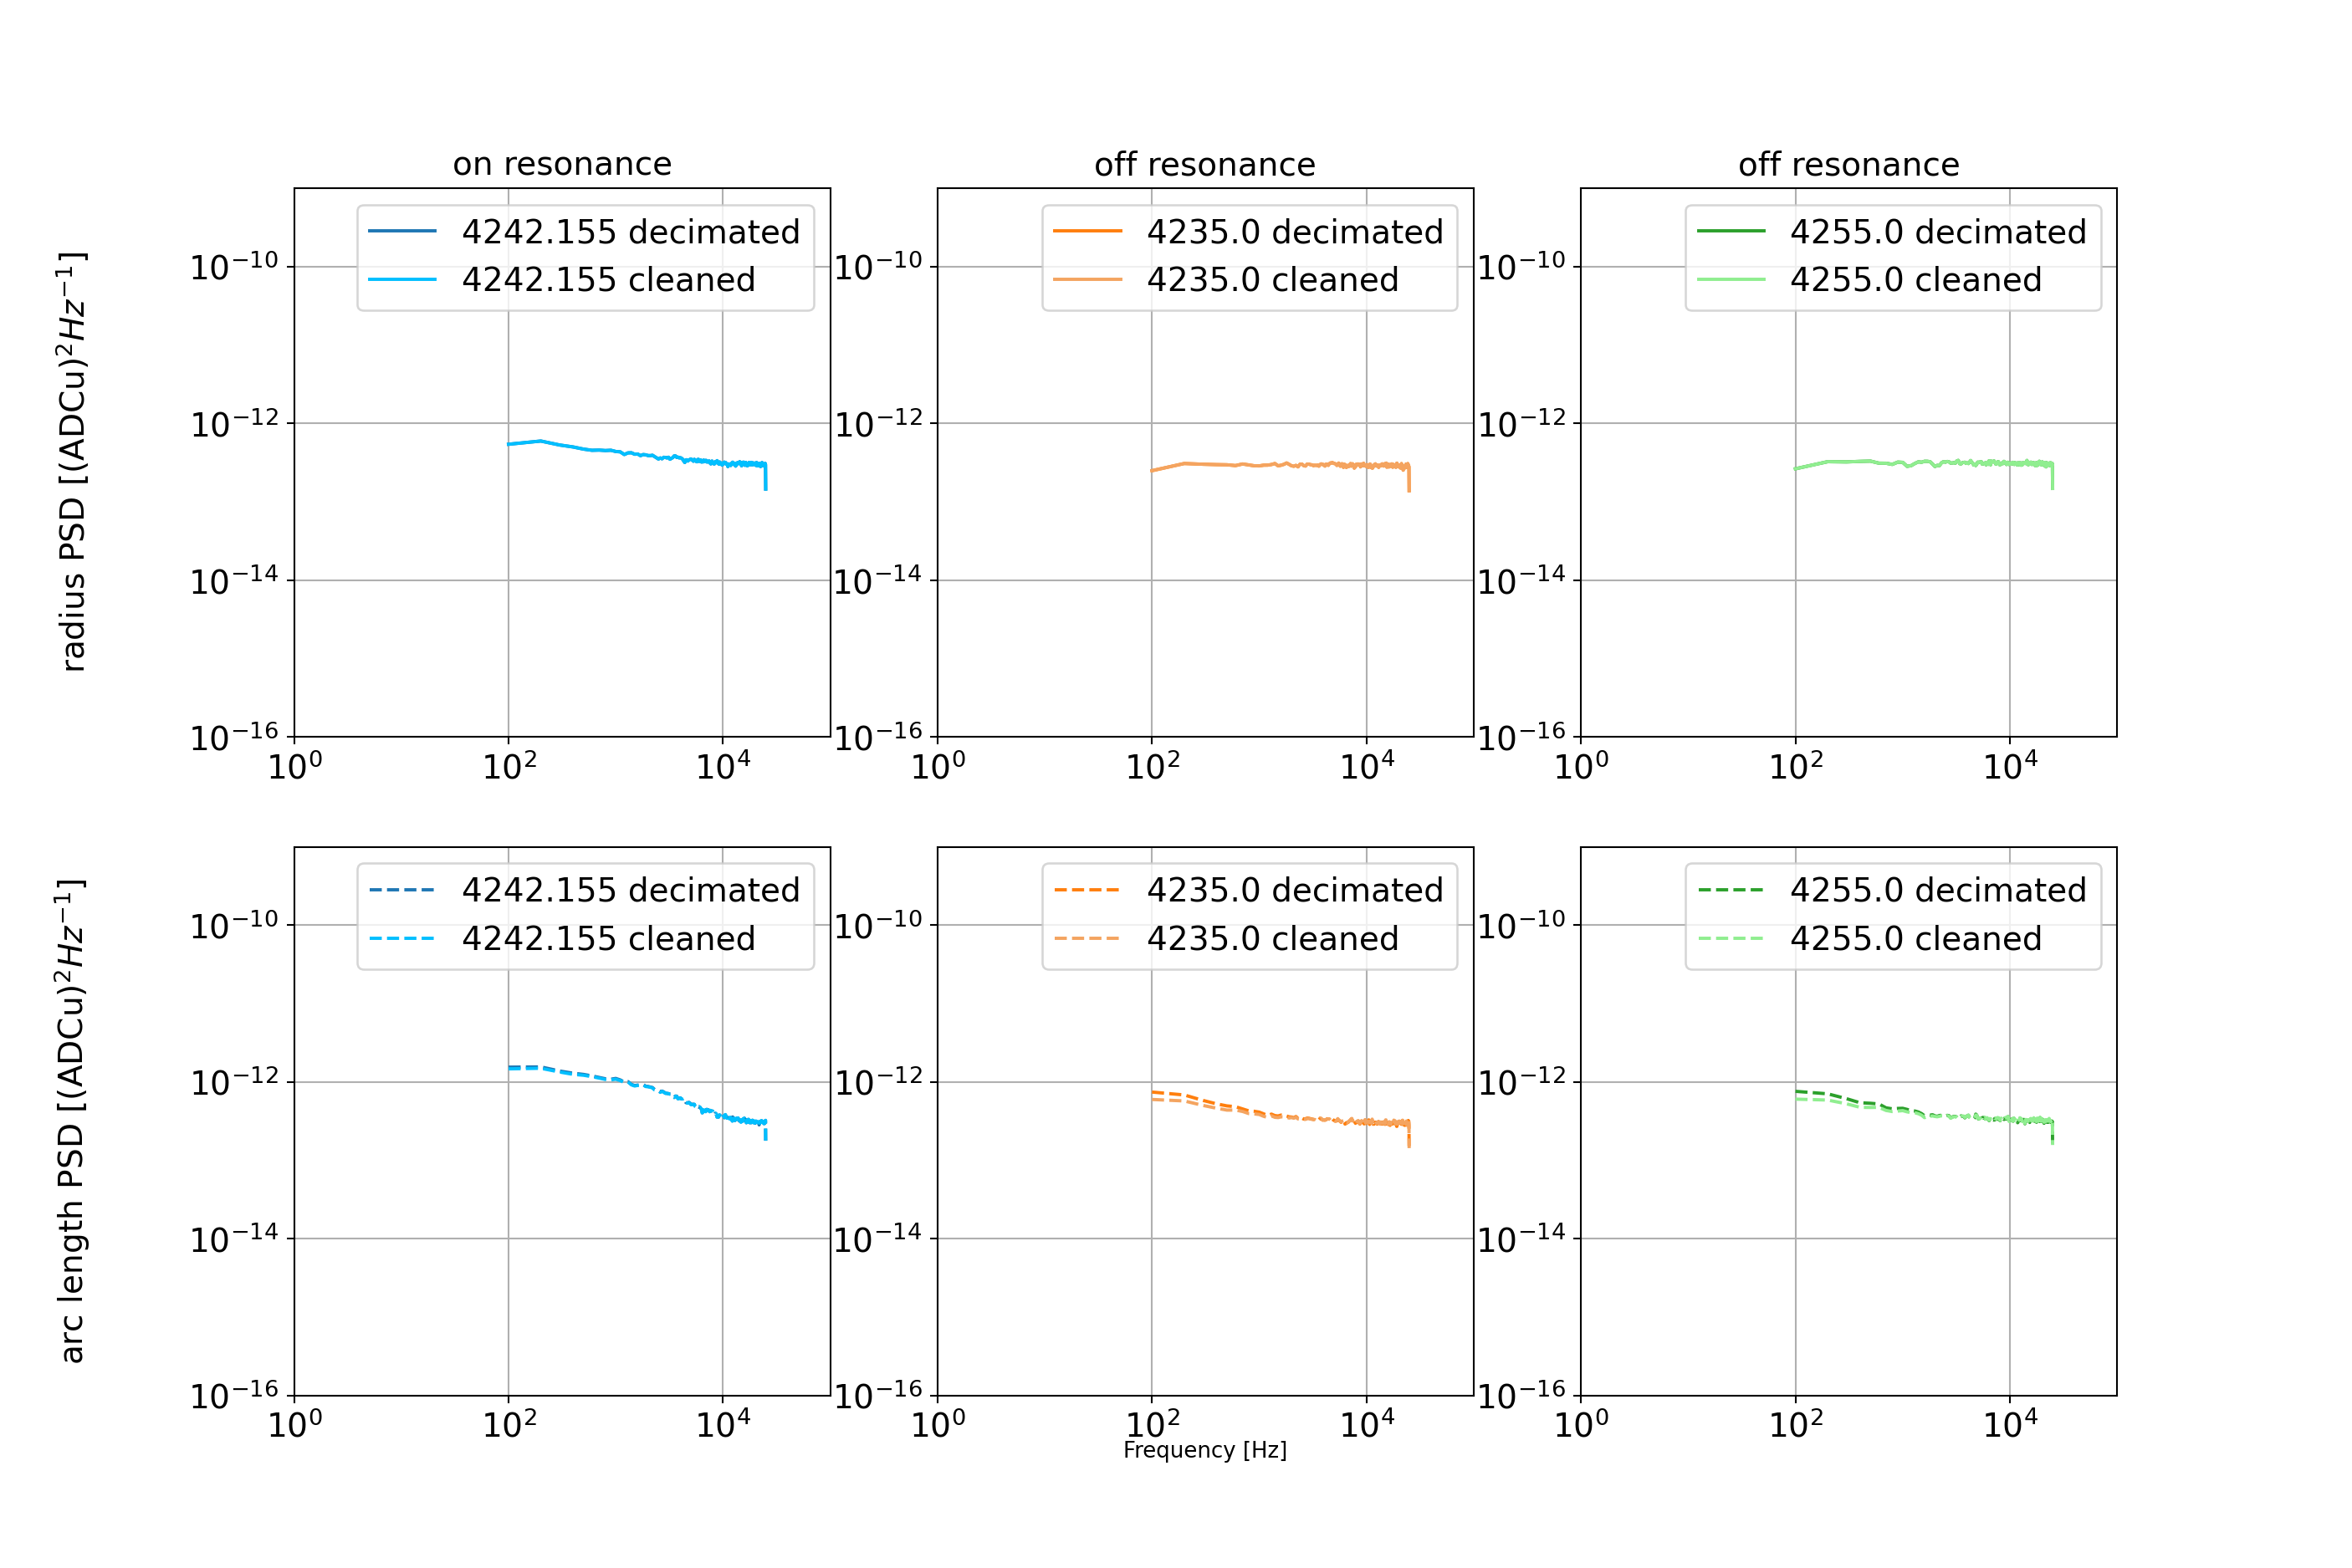

<IPython.core.display.Javascript object>


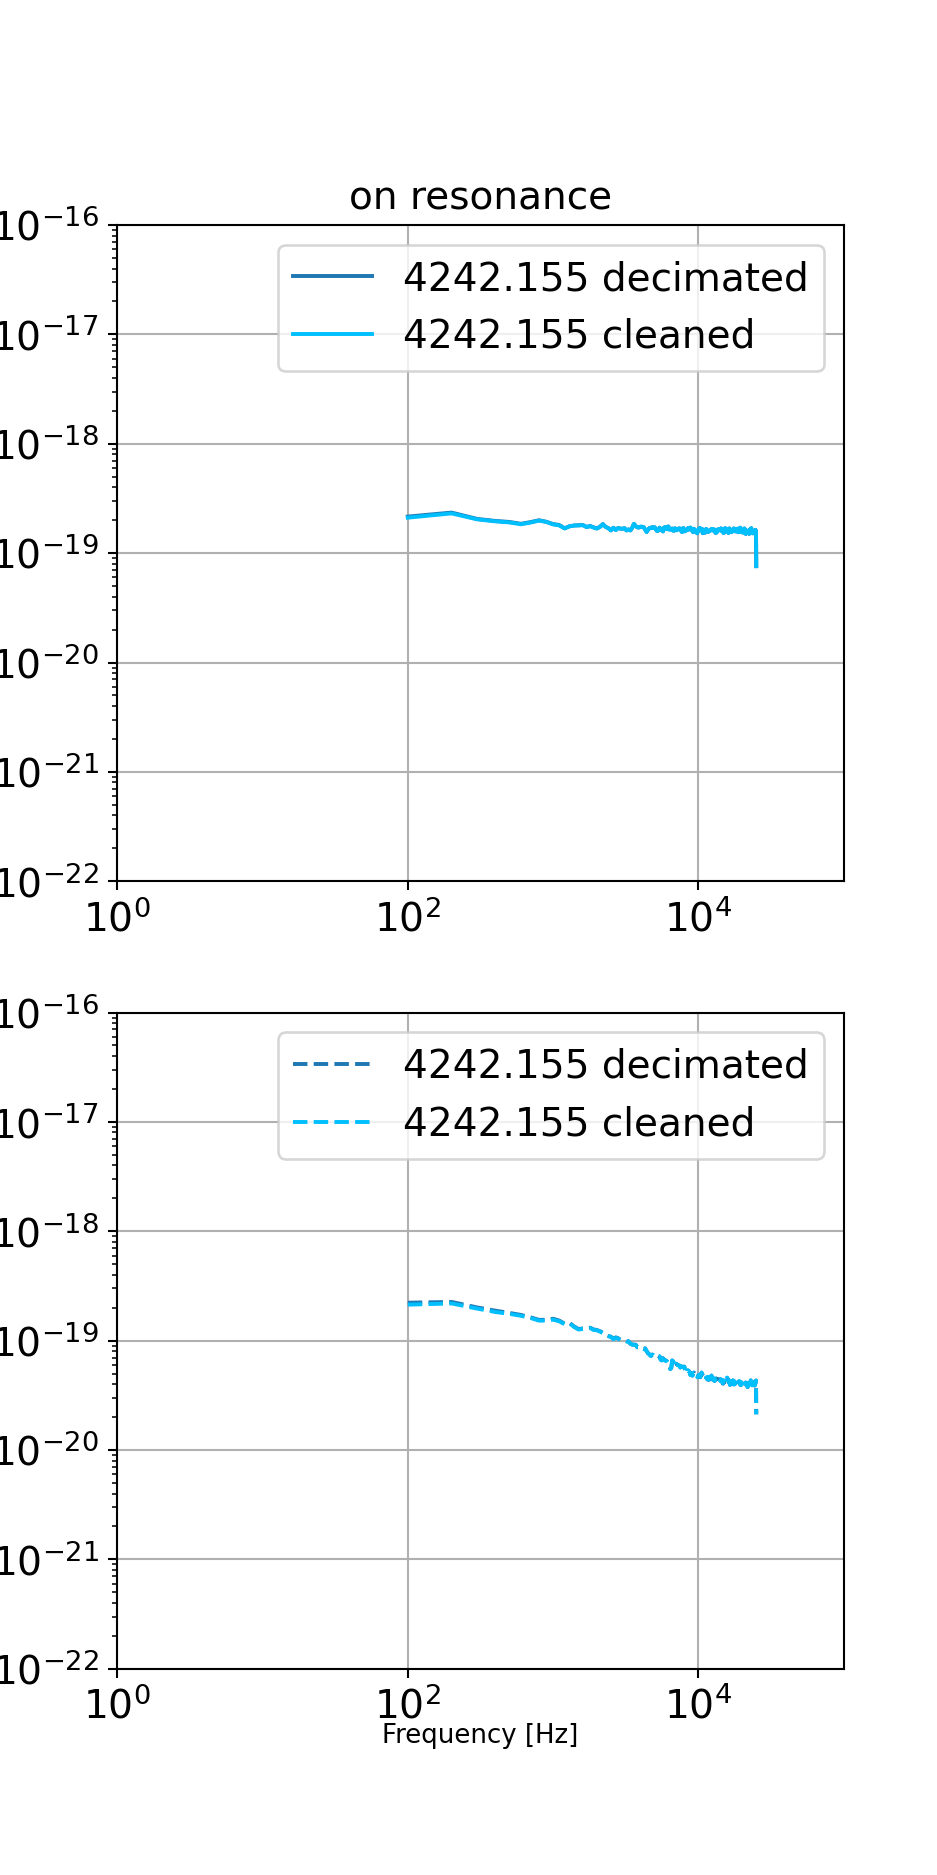

In [7]:
powers_, PSDs_, res_, timestreams_ = Thf.CleanPSDs(None,None,series=series, f_transient=0.05)

In [8]:
## Get the timestream and decimate it
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

data_noise, data_info = PUf.unavg_noi(tone_files[0])
time = data_info['time']
time_correction = data_info['sampling period']

data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)
## data_noise is complex values of S21
## can take Re() and Im() to get I, Q
## can take abs() and angle() to get magnitude and phase
time_correction *= dec_fac
time = time[::dec_fac]

In [9]:
res = Ptt.readDataFile(series)

Line Delay file:  /data/USRP_Noise_Scans/20220715/20220715_143614/USRP_Delay_20220715_143614.h5
VNA scan file:    /data/USRP_Noise_Scans/20220715/20220715_143614/USRP_VNA_20220715_143614.h5
Timestream files: ['/data/USRP_Noise_Scans/20220715/20220715_143614/USRP_Noise_20220715_143614_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220715/20220715_143614/noise_averages_20220715_143614.h5


<IPython.core.display.Javascript object>


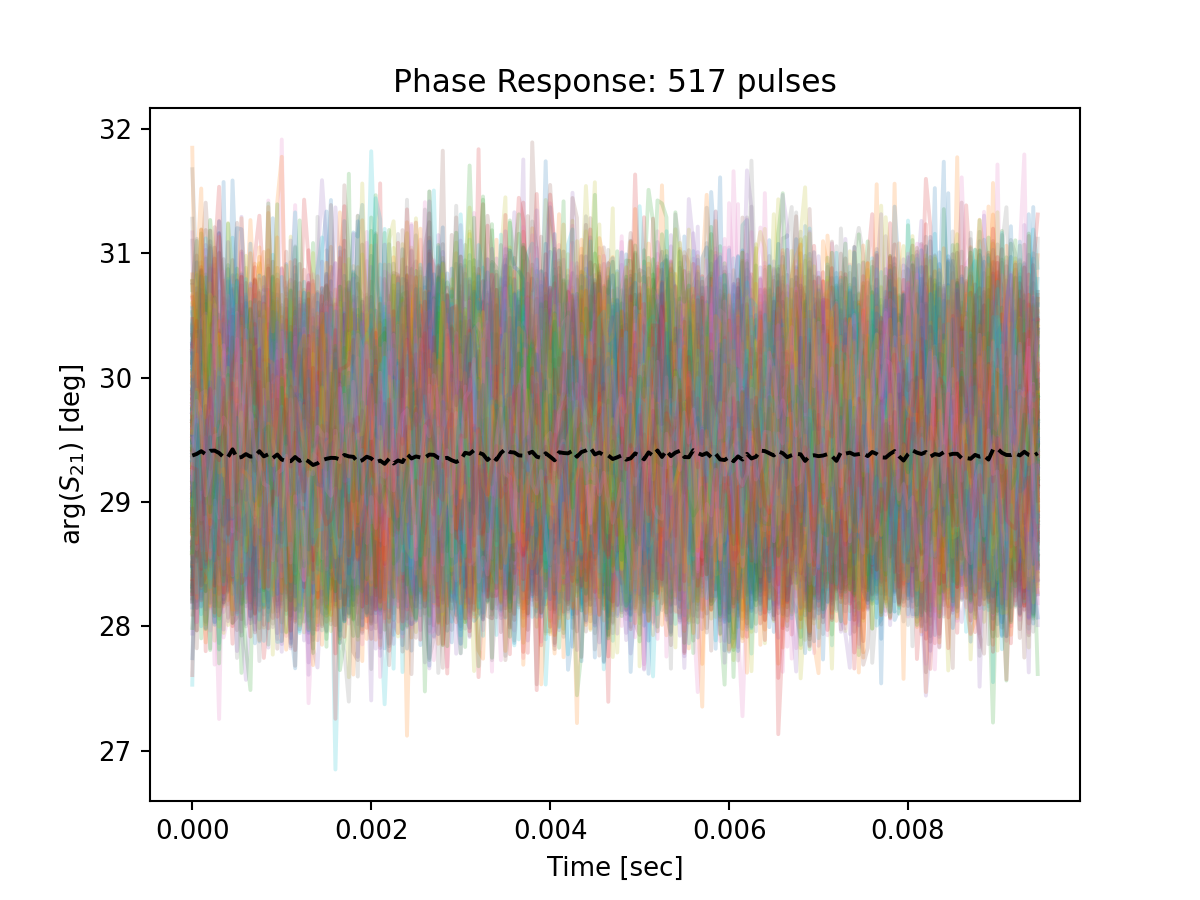

Text(0, 0.5, '$\\mathrm{arg}(S_{21})$ [deg]')

In [10]:
plot_vs_time = True
avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0])*180/np.pi, run_df["pls_sec_s"].iloc[idx],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[idx], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Phase Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$\mathrm{arg}(S_{21})$ [deg]")

<IPython.core.display.Javascript object>


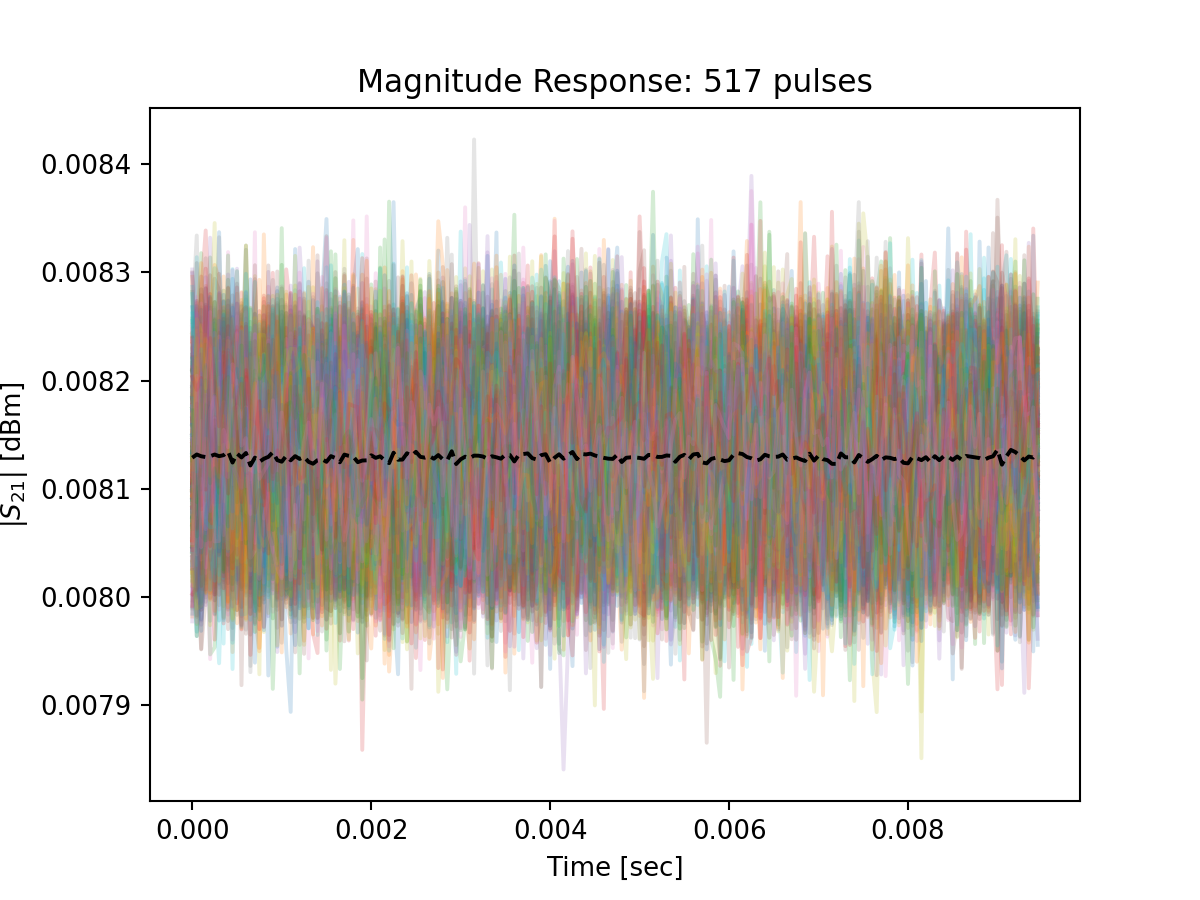

Text(0, 0.5, '$|S_{21}|$ [dBm]')

In [11]:
plot_vs_time = True
avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df["pls_sec_s"].iloc[idx],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[idx], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], sample_rate=1e6/dec_fac,
                                        bl_subtract=False, show_plots=True, plot_time=plot_vs_time)
plt.gca().set_title("Magnitude Response: "+str(npulses)+" pulses")
plt.gca().set_xlabel(r"Decimated sample index")
if plot_vs_time:
    plt.gca().set_xlabel(r"Time [sec]")
plt.gca().set_ylabel(r"$|S_{21}|$ [dBm]")

<IPython.core.display.Javascript object>


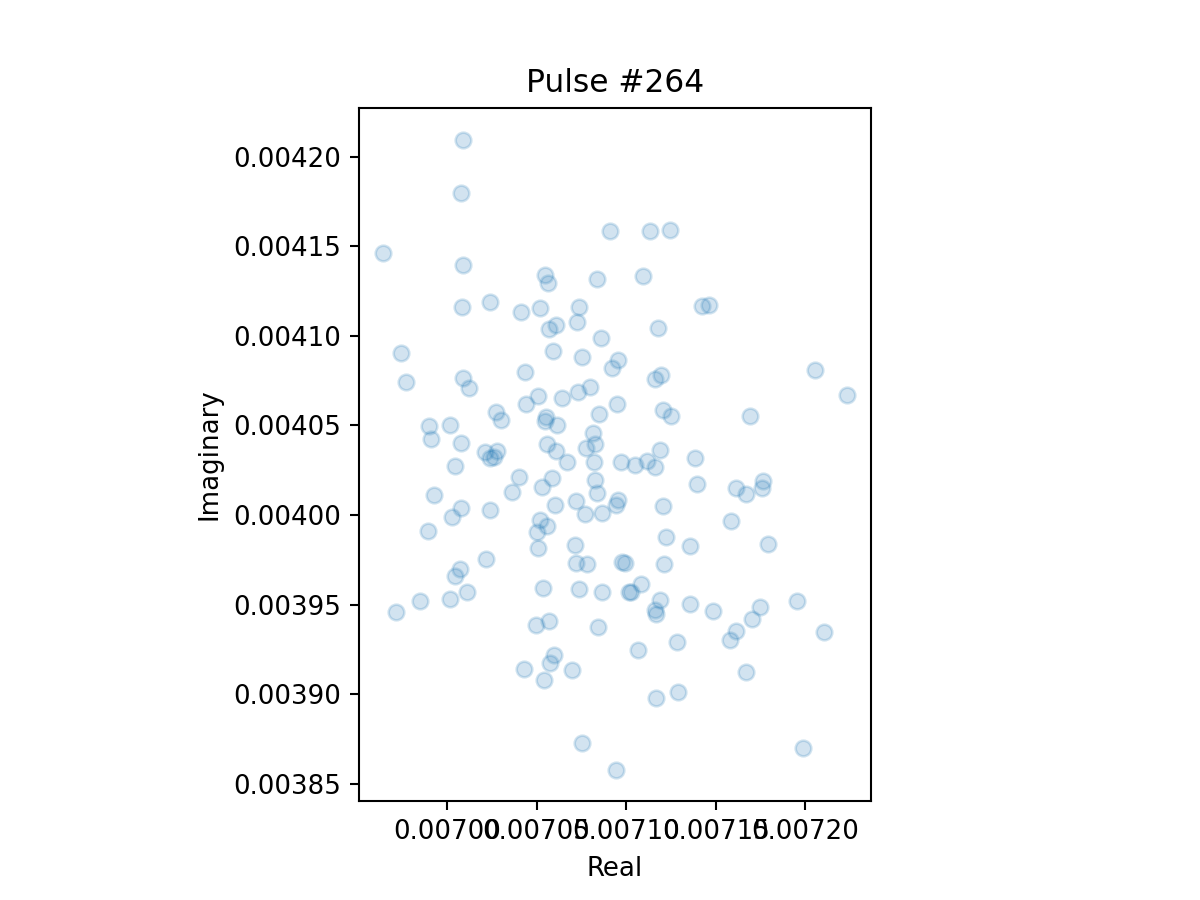

In [12]:
pidx = int(npulses*np.random.rand())
Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=pidx, fig_obj=None,
              pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
              baseline=None, complx=True)
ax0 = plt.gca()
ax0.set_title("Pulse #"+str(pidx))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

In [13]:
VNA_f, VNA_z = PUf.read_vna(vna_file)

<IPython.core.display.Javascript object>


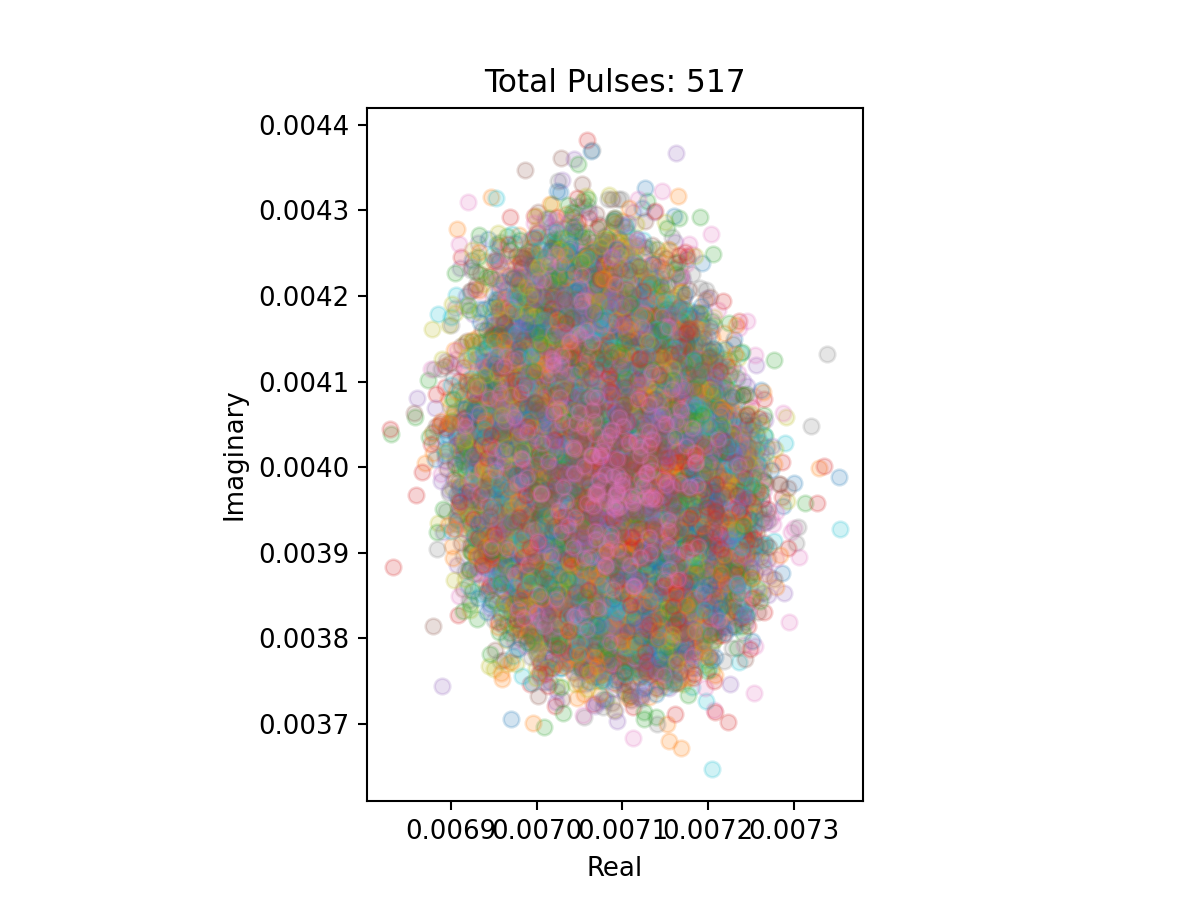

In [14]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

<IPython.core.display.Javascript object>


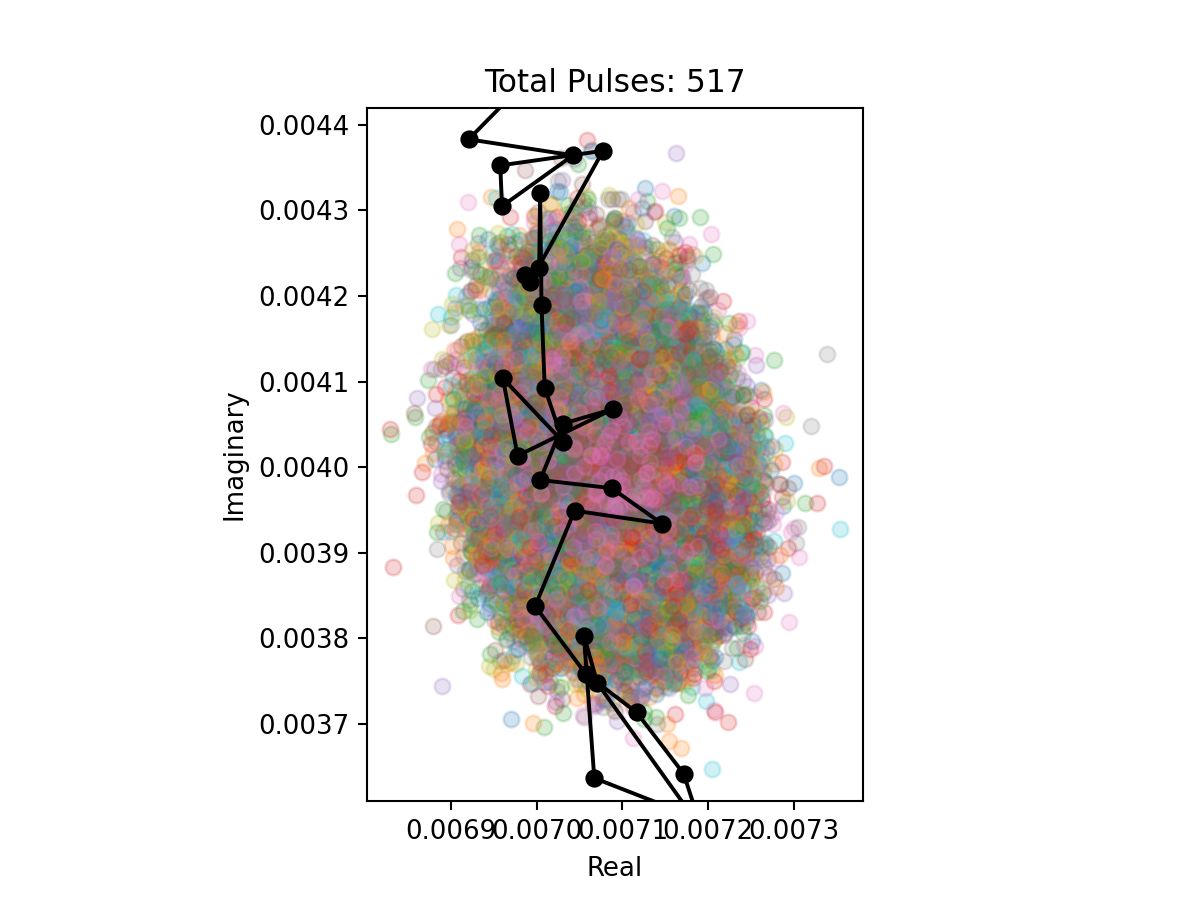

(0.0036099225282669066, 0.004419553279876709)

In [15]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')


xlims = ax0.get_xlim()
ylims = ax0.get_ylim()
ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')
ax0.set_xlim(xlims)
ax0.set_ylim(ylims)

<IPython.core.display.Javascript object>


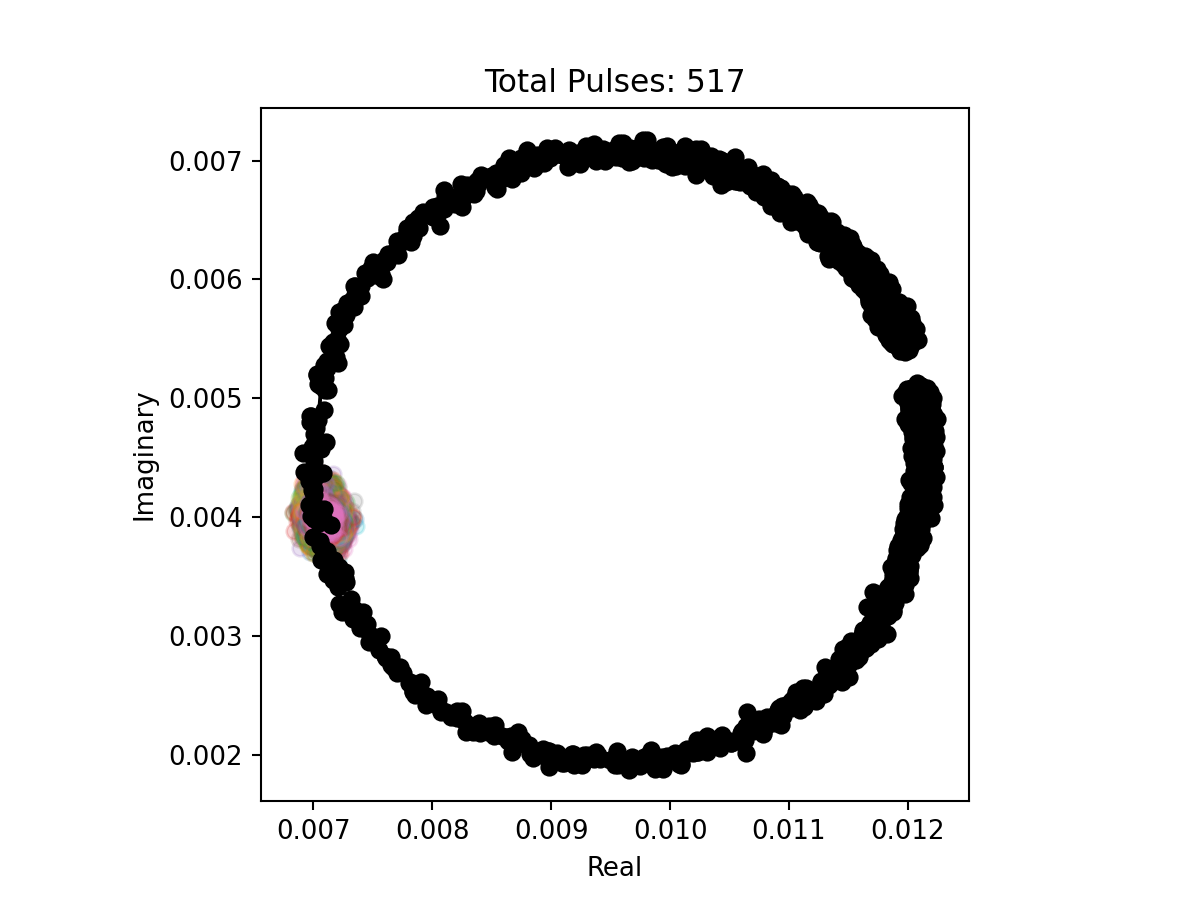

In [16]:
fig = plt.figure()
ax0 = plt.gca()
for i in np.arange(npulses):
    Ptt.PlotPulse(data_noise[:,0], run_df["pls_sec_s"].iloc[idx], p_index=i, fig_obj=fig,
                  pulse_rate_Hz=run_df["p_rate_Hz"].iloc[idx], win_fac=0.75, sample_rate=1e6/dec_fac,
                  baseline=None, complx=True)
ax0.set_title("Total Pulses: "+str(npulses))
ax0.set_xlabel("Real")
ax0.set_ylabel("Imaginary")
ax0.set_aspect('equal', 'box')

ax0.plot(np.real(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         np.imag(VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]),
         "k-",marker='o')

In [17]:
## Size of signal
z_roi = VNA_z[(VNA_f>4.24205e3)*(VNA_f<4.24235e3)]
i_min = np.argmin(np.real(z_roi))
i_max = np.argmax(np.real(z_roi))
rad   = np.abs(z_roi[i_max]-z_roi[i_min])
print(rad)

0.0053449757


In [18]:
## Size of noise
noise = 0.0003247
snr   = rad/noise
print("SNR ~",snr)

SNR ~ 16.461274221489017


<IPython.core.display.Javascript object>


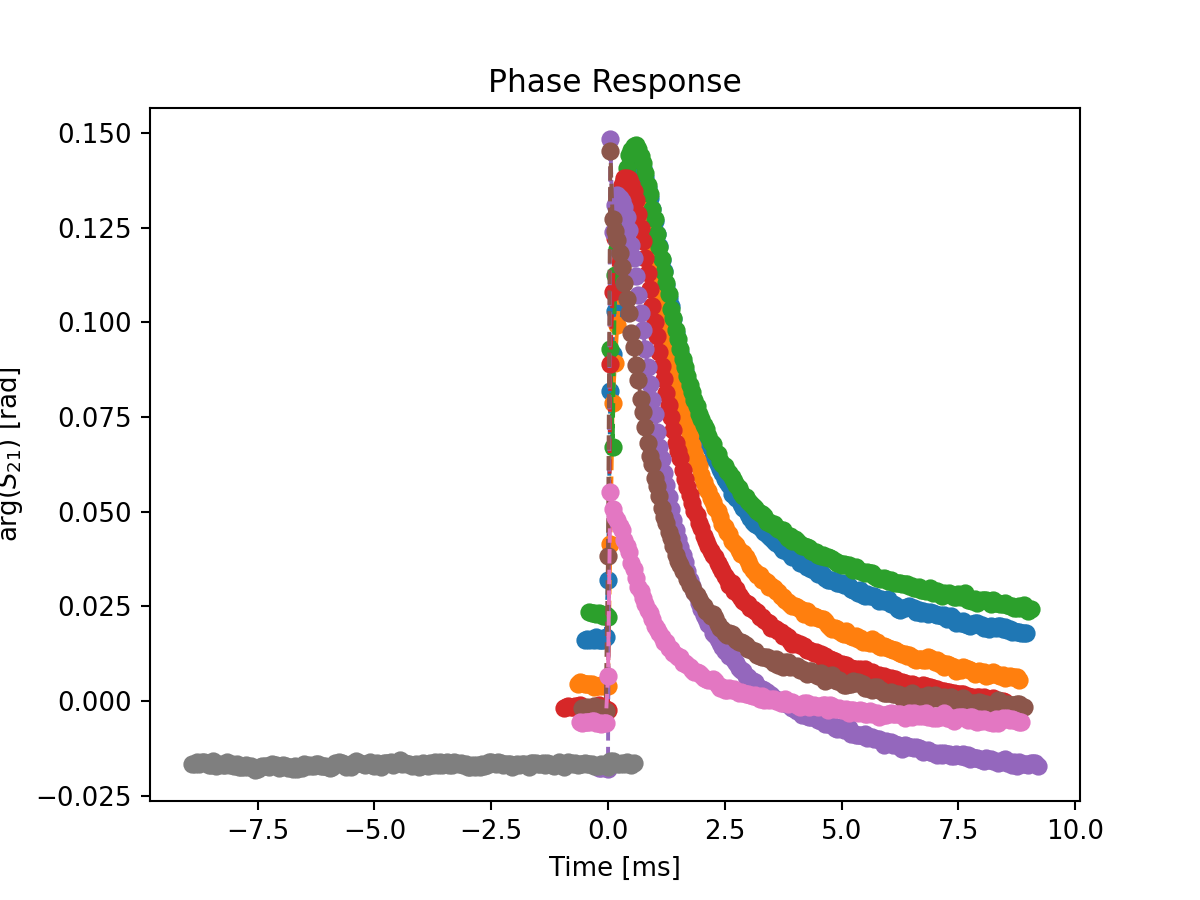

In [19]:
## Create a figure to house the average phase responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Phase Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")

## Now loop over the first three files and extract the average phase response 
for j in np.arange(n_runs):
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.95, Npulses=run_df["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[j], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
# ax0.legend(loc='best')

<IPython.core.display.Javascript object>


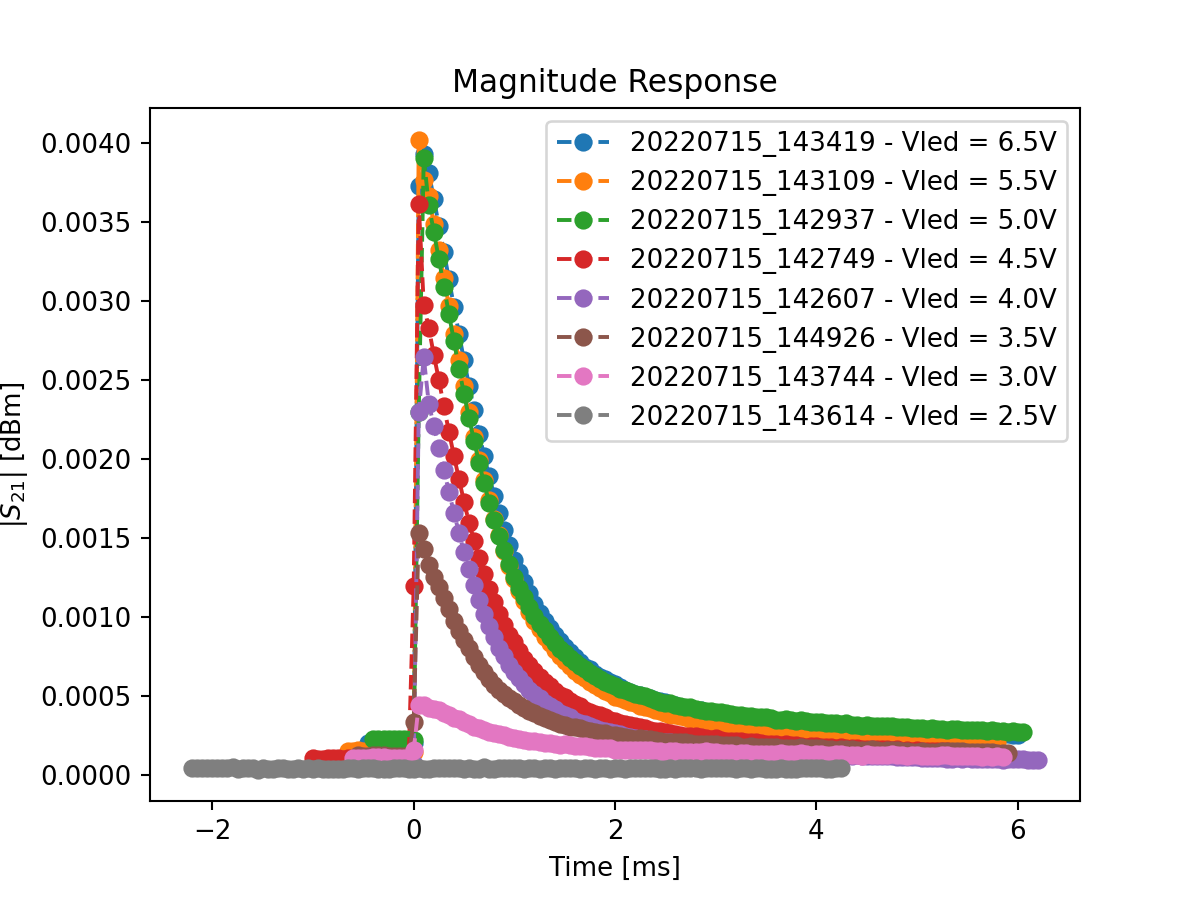

In [20]:
## Create a figure to house the average magnitude responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Magnitude Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$|S_{21}|$ [dBm]")

## Now loop over the first three files and extract the average magnitude response 
for j in np.arange(n_runs):
    series = run_df["series"].iloc[j]
    Vled   = run_df["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df["pls_sec_s"].iloc[j],
                                        win_fac=0.65, Npulses=run_df["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df["p_rate_Hz"].iloc[j], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')

<IPython.core.display.Javascript object>


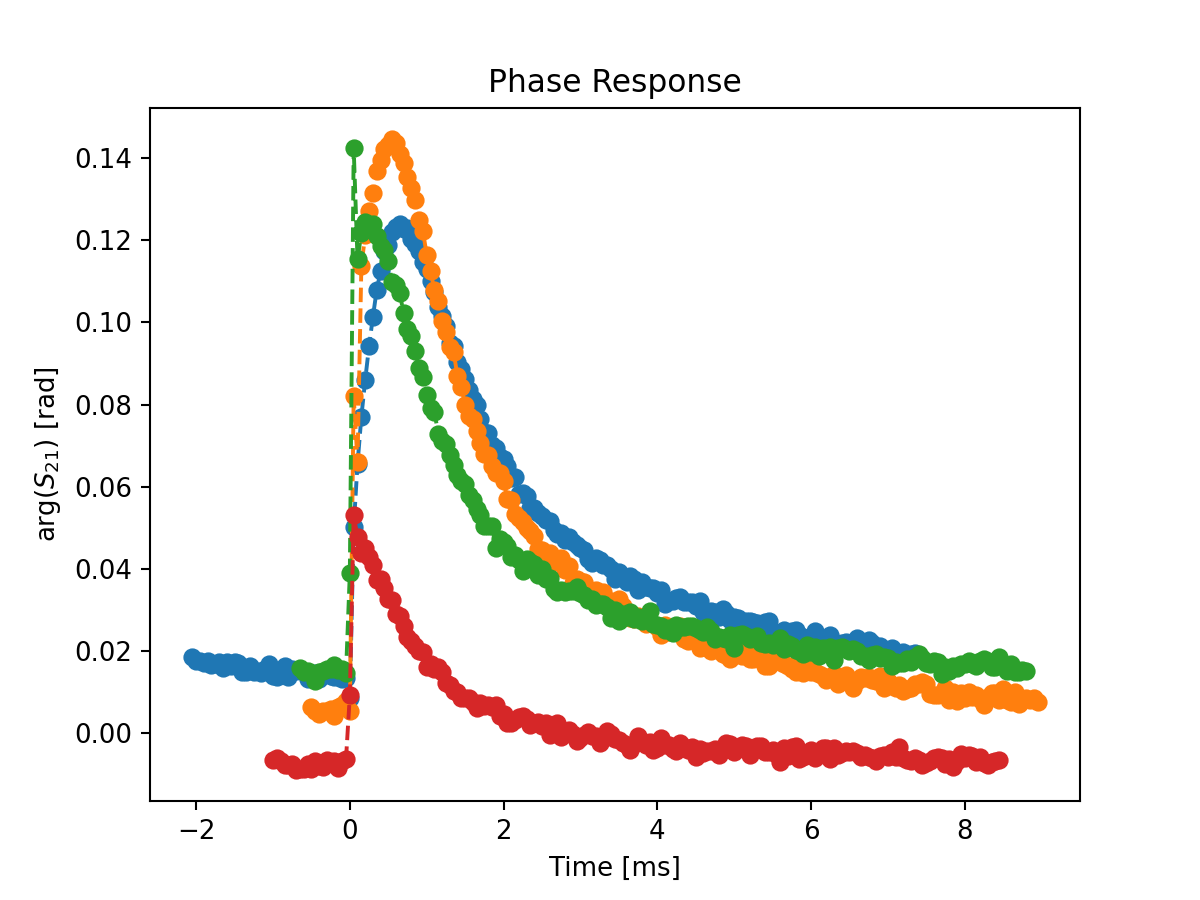

In [21]:
## -50 dBm
## Create a figure to house the average phase responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Phase Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")

## Now loop over the first three files and extract the average phase response 
for j in np.arange(n_runs_50):
    series = run_df_50["series"].iloc[j]
    Vled   = run_df_50["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.angle(data_noise[:,0]), run_df_50["pls_sec_s"].iloc[j],
                                        win_fac=0.95, Npulses=run_df_50["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df_50["p_rate_Hz"].iloc[j], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
# ax0.legend(loc='best')

<IPython.core.display.Javascript object>


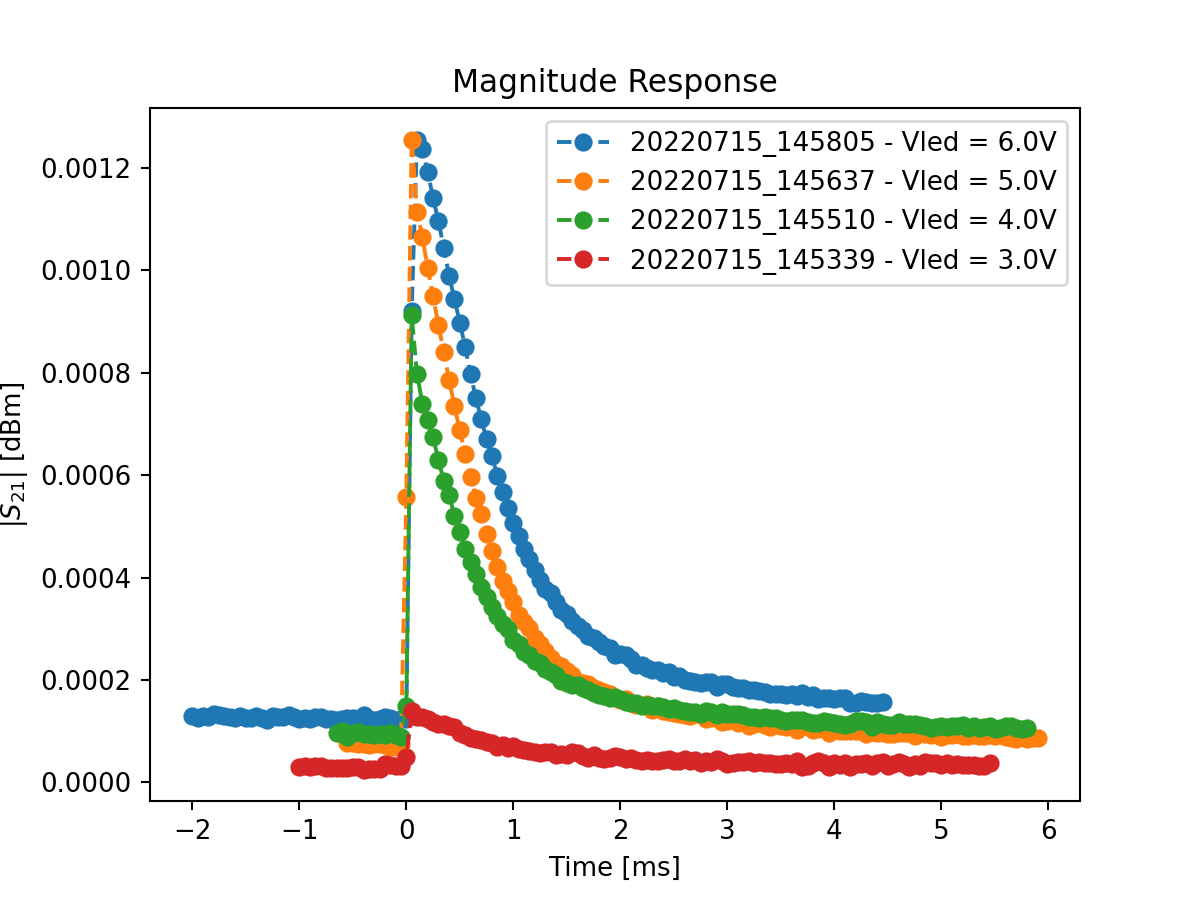

In [22]:
## -50 dBm
## Create a figure to house the average magnitude responses
fig = plt.figure()
ax0 = fig.gca()

ax0.set_title("Magnitude Response")
ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(r"$|S_{21}|$ [dBm]")

## Now loop over the first three files and extract the average magnitude response 
for j in np.arange(n_runs_50):
    series = run_df_50["series"].iloc[j]
    Vled   = run_df_50["Vled"].iloc[j]
    
    ## Get the timestream and decimate it
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series)

    data_noise, data_info = PUf.unavg_noi(tone_files[0])
    data_noise = Prf.average_decimate(data_noise, decimation=dec_fac)

    avg, npulses, bl, win = Ptt.StackPulses(np.abs(data_noise[:,0]), run_df_50["pls_sec_s"].iloc[j],
                                        win_fac=0.65, Npulses=run_df_50["N_pls_fnd"].iloc[j], 
                                        pulse_rate_Hz=run_df_50["p_rate_Hz"].iloc[j], sample_rate=1e6/dec_fac,
                                        bl_subtract=True, show_plots=False, plot_time=True)
    
    time_range = np.arange(len(avg))/(1e6/dec_fac)
    time_range = time_range - time_range[np.argmax(avg[1:]-avg[:-1])]
    
    ax0.plot(time_range*1e3,avg,linestyle="--",marker="o",label=series+" - Vled = "+str(Vled)+"V")
    
ax0.legend(loc='best')